# This notebook comes from Francois Chollet and was donwloaded from https://github.com/fchollet/deep-learning-with-python-notebooks

# This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to deep learning for computer vision

In [1]:
!pip install tensorflow

## Introduction to convnets

**Instantiating a small convnet**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

**Displaying the model's summary**

In [3]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

**Training the convnet on MNIST images**

In [4]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11490434/11490434 [==============================] - 3s 0us/step
Epoch 1/5
938/938 [==============================] - 30s 31ms/step - loss: 0.1576 - accuracy: 0.9515
Epoch 2/5
938/938 [==============================] - 35s 38ms/step - loss: 0.0439 - accuracy: 0.9863
Epoch 3/5
938/938 [==============================] - 32s 35ms/step - loss: 0.0307 - accuracy: 0.9907
Epoch 4/5
938/938 [==============================] - 33s 35ms/step - loss: 0.0228 - accuracy: 0.9930
Epoch 5/5
938/938 [==============================] - 30s 32ms/step - loss: 0.0179 - accuracy: 0.9944


**Evaluating the convnet**

In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 2s 4ms/step - loss: 0.0243 - accuracy: 0.9923
Test accuracy: 0.992


## Training a convnet from scratch on a small dataset

### Downloading the data

In [6]:
from google.colab import files
files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats
!unzip -qq dogs-vs-cats.zip

In [ ]:
!unzip -qq train.zip

**Copying images to training, validation, and test directories**

In [12]:
import os, shutil, pathlib

original_dir = pathlib.Path("Images")
new_base_dir = pathlib.Path("aphid_vs_healthy_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("aphid", "healthy"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=132)
make_subset("validation", start_index=132, end_index=198)
make_subset("test", start_index=198, end_index=330)

### Building the model

**Instantiating a small convnet for dogs vs. cats classification**

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [14]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

**Configuring the model for training**

In [15]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

### Data preprocessing

**Using `image_dataset_from_directory` to read images**

In [16]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 264 files belonging to 2 classes.
Found 132 files belonging to 2 classes.
Found 264 files belonging to 2 classes.


In [17]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [18]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [19]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [20]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
(4, 4)
(4, 4)
(4, 4)


**Displaying the shapes of the data and labels yielded by the `Dataset`**

In [21]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Fitting the model using a `Dataset`**

In [22]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
9/9 [==============================] - 11s 1s/step - loss: 0.8436 - accuracy: 0.5000 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 2/30
9/9 [==============================] - 10s 1s/step - loss: 0.6983 - accuracy: 0.5189 - val_loss: 0.7116 - val_accuracy: 0.5000
Epoch 3/30
9/9 [==============================] - 11s 1s/step - loss: 0.7555 - accuracy: 0.5530 - val_loss: 0.6907 - val_accuracy: 0.5152
Epoch 4/30
9/9 [==============================] - 11s 1s/step - loss: 0.6779 - accuracy: 0.6212 - val_loss: 0.7770 - val_accuracy: 0.5000
Epoch 5/30
9/9 [==============================] - 12s 1s/step - loss: 0.6819 - accuracy: 0.6477 - val_loss: 0.6139 - val_accuracy: 0.6288
Epoch 6/30
9/9 [==============================] - 10s 1s/step - loss: 0.6471 - accuracy: 0.7121 - val_loss: 0.6260 - val_accuracy: 0.6364
Epoch 7/30
9/9 [==============================] - 10s 1s/step - loss: 0.5391 - accuracy: 0.7348 - val_loss: 0.9629 - val_accuracy: 0.6212
Epoch 8/30
9/9 [==================

**Displaying curves of loss and accuracy during training**

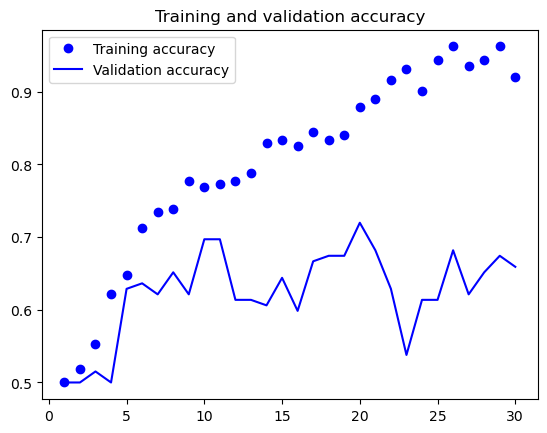

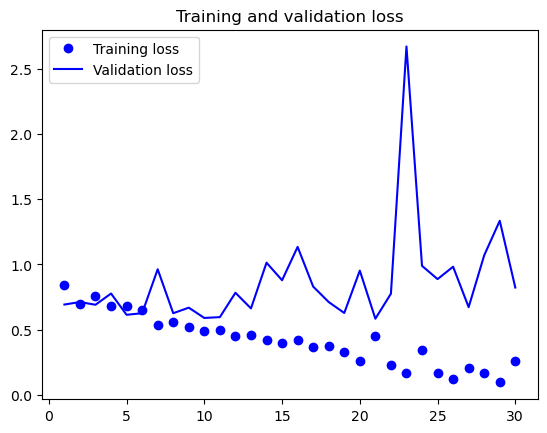

In [23]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [24]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

9/9 [==============================] - 2s 202ms/step - loss: 0.6183 - accuracy: 0.7197
Test accuracy: 0.720


### Using data augmentation

**Define a data augmentation stage to add to an image model**

In [25]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

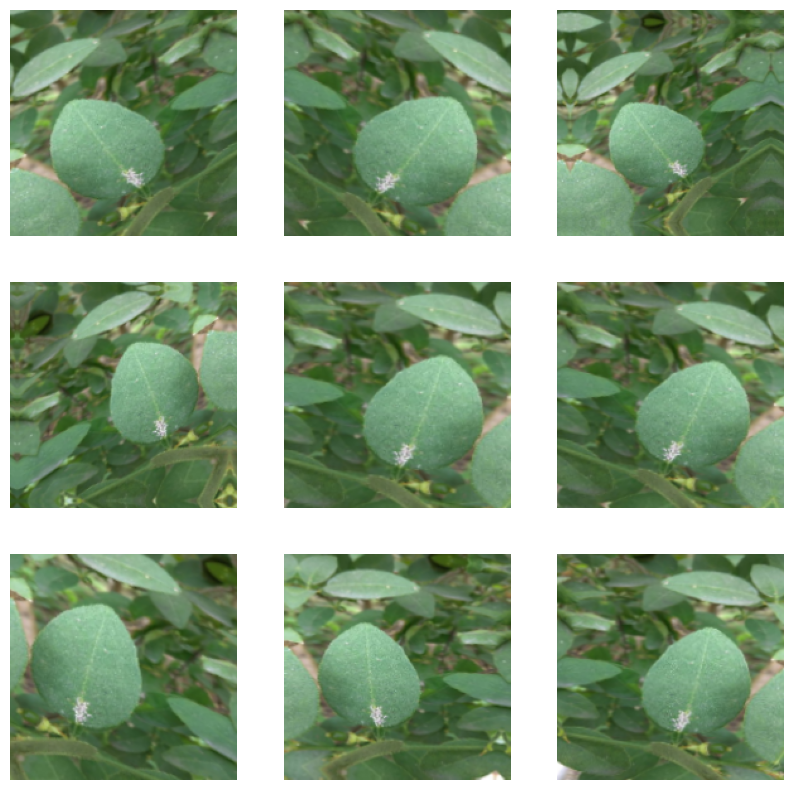

In [26]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [27]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [28]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
9/9 [==============================] - 14s 1s/step - loss: 0.7351 - accuracy: 0.4432 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 2/100
9/9 [==============================] - 12s 1s/step - loss: 0.7046 - accuracy: 0.5455 - val_loss: 0.6887 - val_accuracy: 0.5076
Epoch 3/100
9/9 [==============================] - 12s 1s/step - loss: 0.6775 - accuracy: 0.6250 - val_loss: 0.7392 - val_accuracy: 0.5000
Epoch 4/100
9/9 [==============================] - 12s 1s/step - loss: 0.6686 - accuracy: 0.5265 - val_loss: 0.6509 - val_accuracy: 0.6591
Epoch 5/100
9/9 [==============================] - 11s 1s/step - loss: 0.6316 - accuracy: 0.7045 - val_loss: 0.6720 - val_accuracy: 0.5758
Epoch 6/100
9/9 [==============================] - 13s 1s/step - loss: 0.5745 - accuracy: 0.7121 - val_loss: 0.7782 - val_accuracy: 0.6515
Epoch 7/100
9/9 [==============================] - 12s 1s/step - loss: 0.6154 - accuracy: 0.7235 - val_loss: 0.5930 - val_accuracy: 0.6818
Epoch 8/100
9/9 [==========

9/9 [==============================] - 10s 1s/step - loss: 0.3039 - accuracy: 0.8712 - val_loss: 0.6129 - val_accuracy: 0.7955
Epoch 43/100
9/9 [==============================] - 10s 1s/step - loss: 0.1964 - accuracy: 0.9167 - val_loss: 0.6113 - val_accuracy: 0.7045
Epoch 44/100
9/9 [==============================] - 11s 1s/step - loss: 0.2827 - accuracy: 0.8902 - val_loss: 0.6642 - val_accuracy: 0.7576
Epoch 45/100
9/9 [==============================] - 11s 1s/step - loss: 0.1617 - accuracy: 0.9432 - val_loss: 0.7606 - val_accuracy: 0.7803
Epoch 46/100
9/9 [==============================] - 12s 1s/step - loss: 0.1977 - accuracy: 0.9280 - val_loss: 0.7368 - val_accuracy: 0.8030
Epoch 47/100
9/9 [==============================] - 11s 1s/step - loss: 0.2054 - accuracy: 0.9318 - val_loss: 0.8559 - val_accuracy: 0.7955
Epoch 48/100
9/9 [==============================] - 10s 1s/step - loss: 0.2549 - accuracy: 0.8864 - val_loss: 0.7566 - val_accuracy: 0.7197
Epoch 49/100
9/9 [===============

9/9 [==============================] - 12s 1s/step - loss: 0.3015 - accuracy: 0.9318 - val_loss: 1.0674 - val_accuracy: 0.7500


**Evaluating the model on the test set**

In [29]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

9/9 [==============================] - 2s 207ms/step - loss: 0.5619 - accuracy: 0.7045
Test accuracy: 0.705


## Leveraging a pretrained model

### Feature extraction with a pretrained model

**Instantiating the VGG16 convolutional base**

In [30]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 18s 0us/step


In [31]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

#### Fast feature extraction without data augmentation

**Extracting the VGG16 features and corresponding labels**

In [32]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 1s 1s/step


In [33]:
train_features.shape

(264, 5, 5, 512)

**Defining and training the densely connected classifier**

In [34]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
9/9 [==============================] - 1s 75ms/step - loss: 39.9432 - accuracy: 0.6818 - val_loss: 41.3777 - val_accuracy: 0.5682
Epoch 2/20
9/9 [==============================] - 1s 75ms/step - loss: 3.2477 - accuracy: 0.9242 - val_loss: 23.7808 - val_accuracy: 0.6591
Epoch 3/20
9/9 [==============================] - 0s 53ms/step - loss: 1.0176 - accuracy: 0.9470 - val_loss: 25.5785 - val_accuracy: 0.6439
Epoch 4/20
9/9 [==============================] - 0s 56ms/step - loss: 1.1053 - accuracy: 0.9811 - val_loss: 25.9213 - val_accuracy: 0.6515
Epoch 5/20
9/9 [==============================] - 1s 62ms/step - loss: 0.1473 - accuracy: 0.9924 - val_loss: 27.4662 - val_accuracy: 0.6364
Epoch 6/20
9/9 [==============================] - 1s 88ms/step - loss: 0.2406 - accuracy: 0.9886 - val_loss: 18.1201 - val_accuracy: 0.6818
Epoch 7/20
9/9 [==============================] - 0s 54ms/step - loss: 0.7640 - accuracy: 0.9659 - val_loss: 30.9280 - val_accuracy: 0.6439
Epoch 8/20
9/9 [===

**Plotting the results**

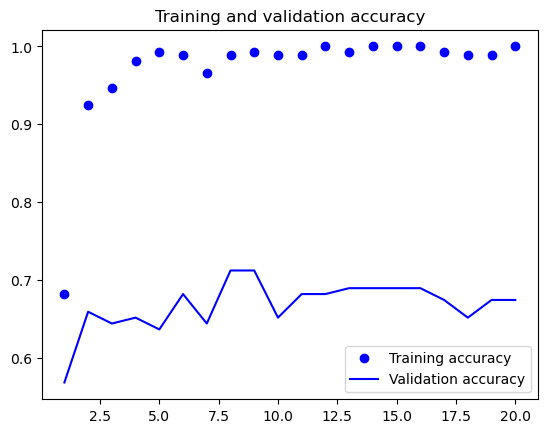

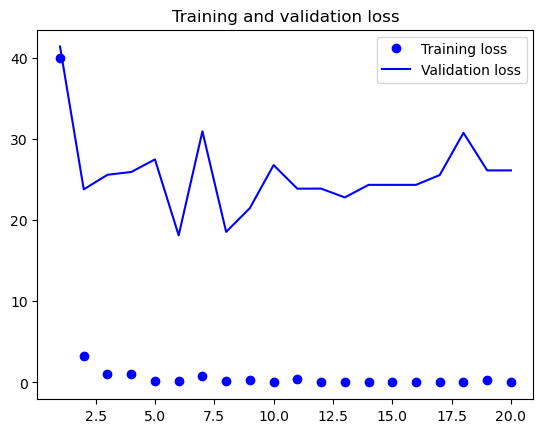

In [35]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [36]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [37]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [38]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [39]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [40]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
9/9 [==============================] - 57s 6s/step - loss: 42.3489 - accuracy: 0.5871 - val_loss: 46.7249 - val_accuracy: 0.5682
Epoch 2/50
9/9 [==============================] - 58s 7s/step - loss: 5.2351 - accuracy: 0.8750 - val_loss: 17.7086 - val_accuracy: 0.6439
Epoch 3/50
9/9 [==============================] - 57s 6s/step - loss: 1.6161 - accuracy: 0.9356 - val_loss: 25.2530 - val_accuracy: 0.6364
Epoch 4/50
9/9 [==============================] - 53s 6s/step - loss: 2.3677 - accuracy: 0.9091 - val_loss: 20.4832 - val_accuracy: 0.5909
Epoch 5/50
9/9 [==============================] - 55s 6s/step - loss: 2.2328 - accuracy: 0.9394 - val_loss: 23.8791 - val_accuracy: 0.6136
Epoch 6/50
9/9 [==============================] - 64s 7s/step - loss: 4.9519 - accuracy: 0.8788 - val_loss: 28.5865 - val_accuracy: 0.5909
Epoch 7/50
9/9 [==============================] - 60s 7s/step - loss: 2.3116 - accuracy: 0.9280 - val_loss: 28.2168 - val_accuracy: 0.6439
Epoch 8/50
9/9 [==========

9/9 [==============================] - 57s 6s/step - loss: 0.3884 - accuracy: 0.9811 - val_loss: 33.2160 - val_accuracy: 0.6212
Epoch 43/50
9/9 [==============================] - 48s 6s/step - loss: 0.8946 - accuracy: 0.9773 - val_loss: 39.4241 - val_accuracy: 0.6439
Epoch 44/50
9/9 [==============================] - 49s 6s/step - loss: 0.0958 - accuracy: 0.9962 - val_loss: 32.7200 - val_accuracy: 0.6288
Epoch 45/50
9/9 [==============================] - 49s 6s/step - loss: 0.4146 - accuracy: 0.9811 - val_loss: 28.0585 - val_accuracy: 0.7045
Epoch 46/50
9/9 [==============================] - 49s 6s/step - loss: 0.3968 - accuracy: 0.9848 - val_loss: 33.0892 - val_accuracy: 0.6591
Epoch 47/50
9/9 [==============================] - 53s 6s/step - loss: 0.3954 - accuracy: 0.9886 - val_loss: 32.3413 - val_accuracy: 0.6818
Epoch 48/50
9/9 [==============================] - 62s 7s/step - loss: 0.6060 - accuracy: 0.9886 - val_loss: 31.0584 - val_accuracy: 0.6439
Epoch 49/50
9/9 [===============

**Evaluating the model on the test set**

In [41]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

9/9 [==============================] - 31s 3s/step - loss: 7.9544 - accuracy: 0.8106
Test accuracy: 0.811


### Fine-tuning a pretrained model

In [42]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

**Freezing all layers until the fourth from the last**

In [43]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Fine-tuning the model**

In [44]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
9/9 [==============================] - 73s 8s/step - loss: 0.5624 - accuracy: 0.9848 - val_loss: 29.6328 - val_accuracy: 0.6818
Epoch 2/30
9/9 [==============================] - 70s 8s/step - loss: 0.1848 - accuracy: 0.9811 - val_loss: 31.3283 - val_accuracy: 0.6894
Epoch 3/30
9/9 [==============================] - 61s 7s/step - loss: 0.1868 - accuracy: 0.9924 - val_loss: 30.1870 - val_accuracy: 0.6970
Epoch 4/30
9/9 [==============================] - 60s 7s/step - loss: 0.0591 - accuracy: 0.9886 - val_loss: 29.6331 - val_accuracy: 0.6742
Epoch 5/30
9/9 [==============================] - 60s 7s/step - loss: 0.2160 - accuracy: 0.9886 - val_loss: 29.5921 - val_accuracy: 0.6742
Epoch 6/30
9/9 [==============================] - 64s 7s/step - loss: 0.1397 - accuracy: 0.9924 - val_loss: 29.4664 - val_accuracy: 0.6818
Epoch 7/30
9/9 [==============================] - 61s 7s/step - loss: 0.1495 - accuracy: 0.9962 - val_loss: 29.9500 - val_accuracy: 0.6818
Epoch 8/30
9/9 [===========

In [45]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

9/9 [==============================] - 38s 4s/step - loss: 14.8785 - accuracy: 0.8333
Test accuracy: 0.833


## Summary